In [38]:
import matplotlib.pyplot as plt
import math
from collections import deque

In [39]:
def collatz(n):
    """Classic Collatz set"""
    while True:
        yield n
        if n == 1:
            break
        n = n * 3 + 1 if n & 1 else n // 2


def mcollatz(n):
    """Modified Collatz set

        This takes the shortcut that if N is odd, N*3+1 will always be even
        and so jumps immediately to the next number.
    """
    while True:
        yield n
        if n == 1:
            break
        n = (n * 3 + 1) // 2 if n & 1 else n // 2

def fibonacci(m,n):
    """Generate elements m through n-1 of the Fibonacci series"""
    a, b = 0, 1
    for k in range(n):
        if k >= m:
            yield a
        a, b = b, a + b


In [40]:
def line_seg(x1, y1, a, dh):
    """Returns the new end point of line segment beginning at p(x1,y1) having
    angle a and length dh.
    
        returns (x,y) : new end point
    """
    x = dh * math.cos(a) + x1
    y = dh * math.sin(a) + y1
    return (x,y)

def line_tilt(x1, y1, x2, y2, a):
    """Returns the new end point of a line p1(x,y)-p2(x,y) tilted by
    angle a (radians) relative to p1.
    
        returns (x,y) : new end point
    """
    cosa = math.cos(a)
    sina = math.sin(a)
    x = (x2 - x1) * cosa - (y2 - y1) * sina + x1
    y = (y2 - y1) * cosa + (x2 - x1) * sina + y1
    return (x,y)

def lookupColor(n):
    if n <= 100:
        return (1,1,1)
    elif n <= 1000:
        return (.3, .3, 1)
    elif n <= 10000:
        return (.3, 1, .3)
    elif n <= 100000:
        return (1, .3, .3)
    else:
        return (.7, .7, .2)
        

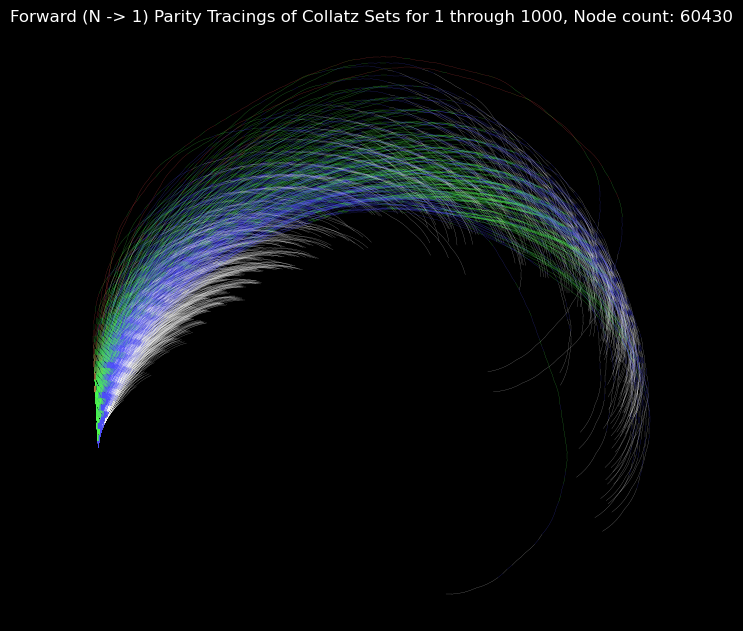

In [41]:
# Parity tracings of Collatz sets

# For each element of each Collatz set, a short line segment
# is drawn with its direction slightly rotated to the left
# or right depending on its parity.  The initial line segment
# of each set begins at the origin.  Subsequent segments begin
# from the point at which the prior segment ended.

fig, ax = plt.subplots(figsize=(10.24,7.68))
ax.set_aspect(1)
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# Calculate Collatz sets from m to n
m = 1
n = 1000

# Angular deflection for indicating parity
ia = math.pi / 32

# Length of individual line segments
l = 10

# Node count accumulator
nodecount = 0

for i in range(m,n):
    cset = [(v, v&1) for v in collatz(i)]
    nodecount += len(cset)
    oldx = 0
    oldy = 0
    olda = math.pi / 2
    for v, p in cset[:-1]:
        if p:
            a = olda + ia
        else:
            a = olda - ia
        x, y = line_seg(oldx, oldy, a, l)
        ax.plot([oldx,x],[oldy,y], color=lookupColor(v), linewidth=.1)
        oldx = x
        oldy = y
        olda = a

ax.set_title(f'Forward (N -> 1) Parity Tracings of Collatz Sets for {m} through {n}, Node count: {nodecount}', color="white")
#plt.savefig('graph1.png',dpi=120)
del fig, ax

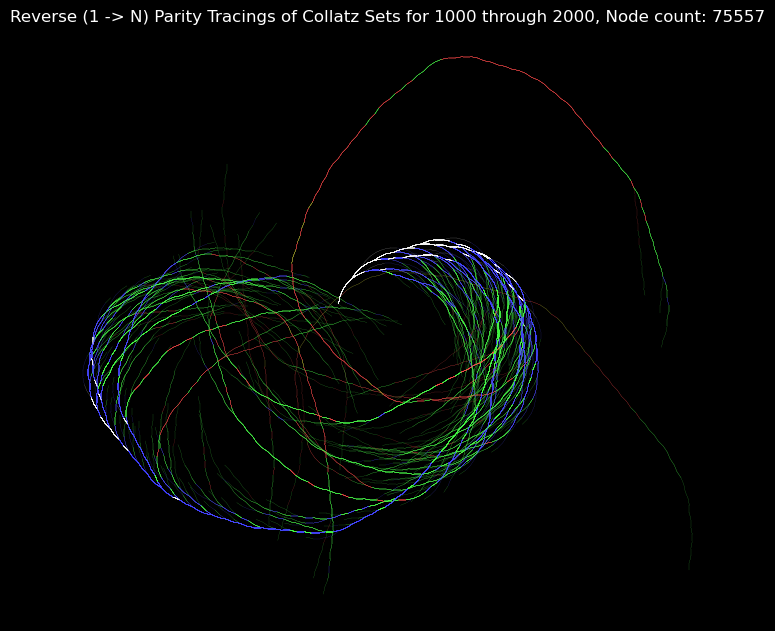

In [7]:
# Parity tracings of Collatz sets

# For each element of each Collatz set, a short line segment
# is drawn with its direction slightly rotated to the left
# or right depending on its parity.  The initial line segment
# of each set begins at the origin.  Subsequent segments begin
# from the point at which the prior segment ended.

# Set elements are reversed

fig, ax = plt.subplots(figsize=(10.24,7.68))
ax.set_aspect(1)
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# Calculate Collatz sets from m to n
m = 1000
n = 2000

# Angular deflection for indicating parity
ia = math.pi / 16

# Length of individual line segments
l = 30

# Node count accumulator
nodecount = 0

for i in range(m,n):
    cset = [(v, v&1) for v in collatz(i)]
    cset.reverse()
    nodecount += len(cset)
    oldx = 0
    oldy = 0
    olda = math.pi / 2
    for v, p in cset[1:]:
        if p:
            a = olda + ia
        else:
            a = olda - ia
        x, y = line_seg(oldx, oldy, a, l)
        ax.plot([oldx,x],[oldy,y], color=lookupColor(v), linewidth=.1)
        oldx = x
        oldy = y
        olda = a

ax.set_title(f'Reverse (1 -> N) Parity Tracings of Collatz Sets for {m} through {n}, Node count: {nodecount}', color="white")
#plt.savefig('graph2.png',dpi=120)
del fig, ax

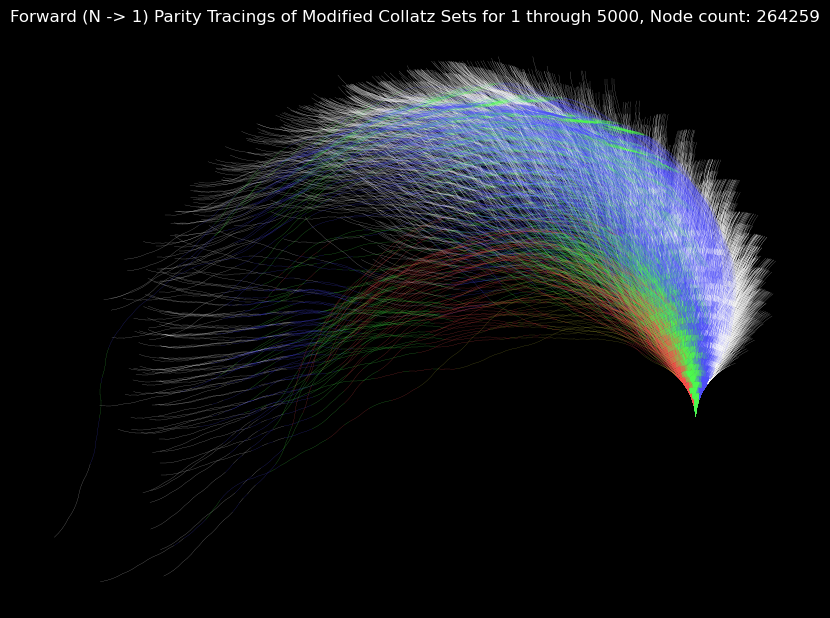

In [40]:
# Parity tracings of modified Collatz sets

fig, ax = plt.subplots(figsize=(10.24,7.68))
ax.set_aspect(1)
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# Calculate modified Collatz sets from m to n
m = 1
n = 5000

# Angular deflection for indicating parity
ia = math.pi / 32

# Length of individual line segments
l = 10

# Node length accumulator
nodecount = 0

for i in range(m,n):
    cset = [(v, v&1) for v in mcollatz(i)]
    nodecount += len(cset)
    oldx = 0
    oldy = 0
    olda = math.pi / 2
    for v, p in cset[:-1]:
        if p:
            a = olda + ia
        else:
            a = olda - ia
        x, y = line_seg(oldx, oldy, a, l)
        ax.plot([oldx,x],[oldy,y], color=lookupColor(v), linewidth=.1)
        oldx = x
        oldy = y
        olda = a

ax.set_title(f'Forward (N -> 1) Parity Tracings of Modified Collatz Sets for {m} through {n}, Node count: {nodecount}', color="white")
#plt.savefig('graph3.png',dpi=120)
del fig, ax

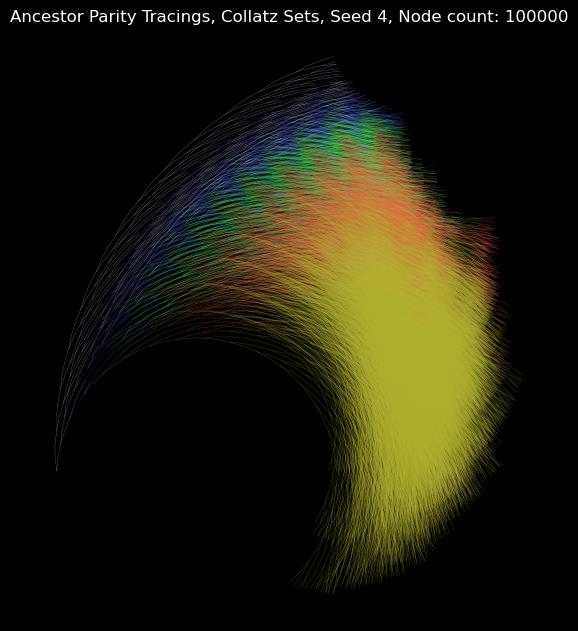

In [41]:
# Ancestor parity tracings
# Based on https://www.youtube.com/watch?v=3ne7N-wvDso&t=522s

# Instead of calculating the complete Collatz set for a set of integers,
# start at node N=1 and calculate the even and odd (if it exists) ancestor.
# Continue in this way for all calculated nodes until a bail-out number
# of nodes is reached.  Here, the nodes are processed breadth-first.

fig, ax = plt.subplots(figsize=(10.24,7.68))
fig.set_facecolor('black')
ax.set_aspect(1)
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# Root seed for the ancestor graph
seed = 4

# Length of individual line segments
l = 10

# Bail out
nodelimit = 100000

# Queue for nodes
nodequeue = deque()

# Tree starts at origin
oldx = 0
oldy = 0

# Starting direction of first line segment (90°)
olda = math.pi / 2

# Angular deflection for indicating even/odd parities
oddda = math.pi / 32
evenda = -oddda


def genParents(n, oldx, oldy, olda):
    global l, nodequeue, oldda, evenda

    #even ancestor
    a = olda + evenda
    x, y = line_seg(oldx, oldy, a, l)
    nodequeue.append([n*2, oldx, oldy, x, y, a])
    
    # odd ancestor
    n = (n - 1) / 3
    if n >= 1 and n % 2 == 1:
        a = olda + oddda
        x, y = line_seg(oldx, oldy, a, l)
        nodequeue.append([n, oldx, oldy, x, y, a])
    
    #print(nodequeue)


genParents(seed, oldx, oldy, olda)
nodecount = 0
while len(nodequeue) > 0:
    node = nodequeue.popleft()
    ax.plot([node[1], node[3]], [node[2], node[4]], color=lookupColor(node[0]), linewidth=.1)
    #ax.plot([node[1], node[3]], [node[2], node[4]], color='white', linewidth=.1)
    nodecount += 1
    if nodecount >= nodelimit:
        break
    genParents(node[0], node[3], node[4], node[5])

ax.set_title(f'Ancestor Parity Tracings, Collatz Sets, Seed {seed}, Node count: {nodecount}', color="white")
#plt.savefig('graph4.png',dpi=120)
del fig, ax

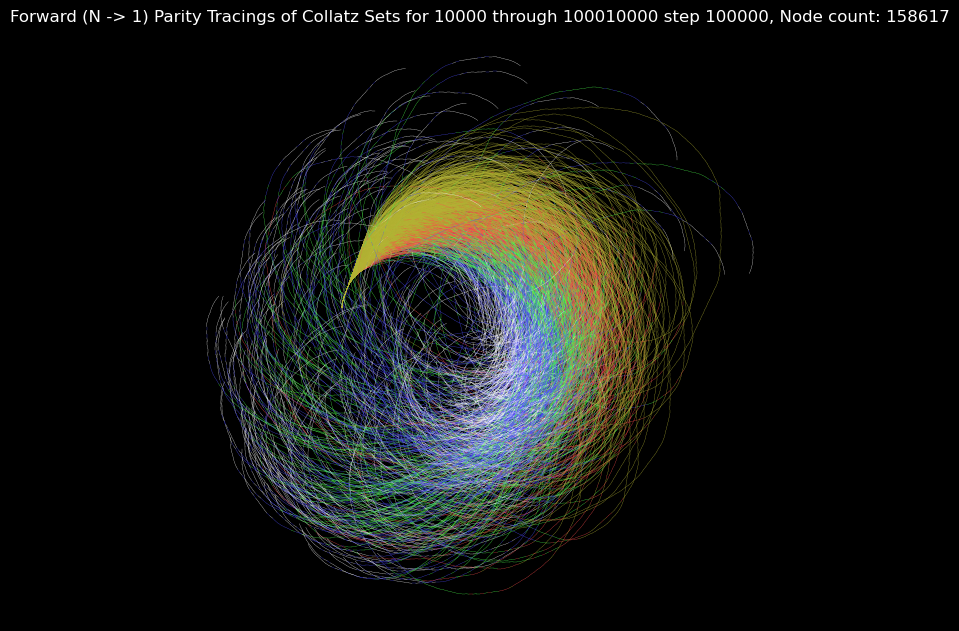

In [50]:
# Parity tracings of Collatz sets

# For each element of each Collatz set, a short line segment
# is drawn with its direction slightly rotated to the left
# or right depending on its parity.  The initial line segment
# of each set begins at the origin.  Subsequent segments begin
# from the point at which the prior segment ended.

# This version increases the magnitude of the seeds but
# introduces a step factor to limit the number of nodes.

fig, ax = plt.subplots(figsize=(10.24,7.68))
ax.set_aspect(1)
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# Calculate Collatz sets from m to n
m = 10000
n = 100010000
step = 100000

# Angular deflection for indicating parity
ia = math.pi / 32

# Length of individual line segments
l = 10

# Node count accumulator
nodecount = 0

for i in range(m,n,step):
    cset = [(v, v&1) for v in collatz(i)]
    nodecount += len(cset)
    oldx = 0
    oldy = 0
    olda = math.pi / 2
    for v, p in cset[:-1]:
        if p:
            a = olda + ia
        else:
            a = olda - ia
        x, y = line_seg(oldx, oldy, a, l)
        ax.plot([oldx,x],[oldy,y], color=lookupColor(v), linewidth=.2)
        oldx = x
        oldy = y
        olda = a

ax.set_title(f'Forward (N -> 1) Parity Tracings of Collatz Sets for {m} through {n} step {step}, Node count: {nodecount}', color="white")
#plt.savefig('graph5.png',dpi=120)
del fig, ax

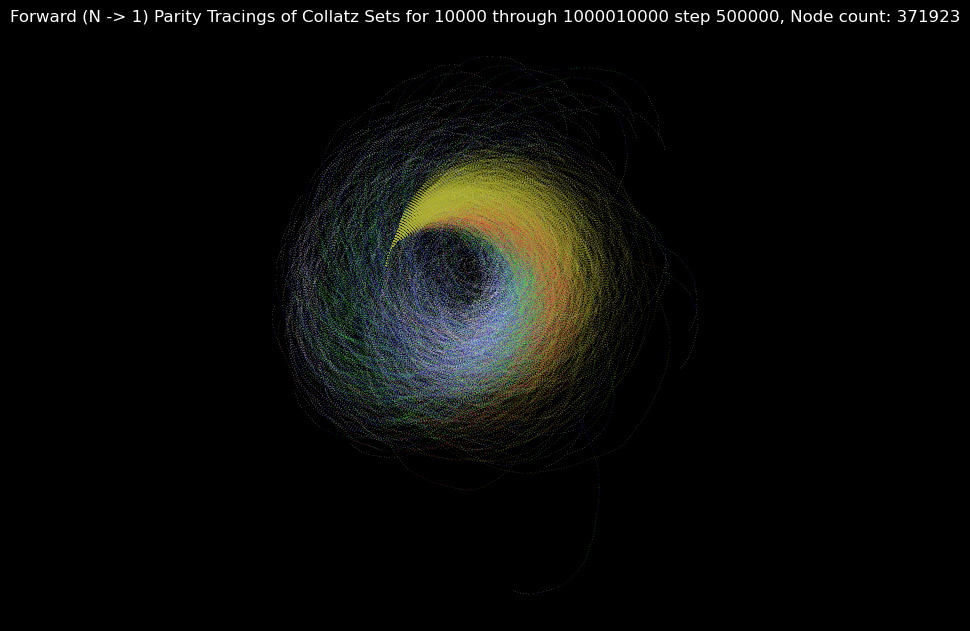

In [51]:
# Parity tracings of Collatz sets

# For each element of each Collatz set, a short line segment
# is drawn with its direction slightly rotated to the left
# or right depending on its parity.  The initial line segment
# of each set begins at the origin.  Subsequent segments begin
# from the point at which the prior segment ended.

# This version increases the magnitude of the seeds but
# introduces a step factor to limit the number of nodes.
# Also the length of the visible line segments is reduced to
# give a dotted/dashed effect.

fig, ax = plt.subplots(figsize=(10.24,7.68))
ax.set_aspect(1)
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# Calculate Collatz sets from m to n
m = 10000
n = 1000010000
step = 500000

# Angular deflection for indicating parity
ia = math.pi / 32

# Length of individual line segments
l = 10
l2 = 1.5

# Node count accumulator
nodecount = 0

for i in range(m,n,step):
    cset = [(v, v&1) for v in collatz(i)]
    nodecount += len(cset)
    oldx = 0
    oldy = 0
    olda = math.pi / 2
    for v, p in cset[:-1]:
        if p:
            a = olda + ia
        else:
            a = olda - ia
        x, y = line_seg(oldx, oldy, a, l2)
        ax.plot([oldx,x],[oldy,y], color=lookupColor(v), linewidth=.2)
        x, y = line_seg(oldx, oldy, a, l)
        oldx = x
        oldy = y
        olda = a

ax.set_title(f'Forward (N -> 1) Parity Tracings of Collatz Sets for {m} through {n} step {step}, Node count: {nodecount}', color="white")
#plt.savefig('graph6.png',dpi=120)
del fig, ax